In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Using TensorFlow backend.


In [2]:
os.getcwd()

'C:\\Users\\abels\\Desktop\\crowd_count'

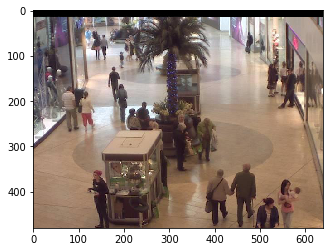

In [3]:
# Load the image
pic_ = plt.imread(r'C:\Users\abels\Desktop\crowd_count\crowd-counting\frames\frames\seq_000001.jpg')

# Display the image
plt.imshow(pic_)
plt.show()

In [4]:
targ_ = np.load(r'C:\Users\abels\Desktop\crowd_count\crowd-counting\labels\labels.npy')

In [1]:
targ_.shape

NameError: name 'targ_' is not defined

In [5]:
images_ = np.load(r'C:\Users\abels\Desktop\crowd_count\crowd-counting\frames\np_frames\images.npy')

In [6]:
images_.shape

(2000, 480, 640, 3)

In [7]:
targ_

array([[35],
       [41],
       [41],
       ...,
       [25],
       [26],
       [26]], dtype=uint8)

In [8]:
max_targ = max(targ_)[0]
print (max_targ)

53


In [9]:
images_.shape

(2000, 480, 640, 3)

In [10]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [11]:
gray_img = rgb2gray(images_[:,:,:,0])

In [12]:
gray_img.shape

(2000, 480)

In [13]:
images_.shape

(2000, 480, 640, 3)

In [14]:
gray_img = np.array([rgb2gray(xi) for xi in images_])

In [15]:
gray_img.shape

(2000, 480, 640)

In [16]:
IMG_SIZE = images_.shape[1]
IMG_SIZE2 = images_.shape[2]

In [17]:
print (IMG_SIZE)
print (IMG_SIZE2)

480
640


In [18]:
images_.shape

(2000, 480, 640, 3)

In [19]:
gray_img.shape

(2000, 480, 640)

In [20]:
gray_img[0].shape

(480, 640)

In [21]:
gray_img[0]

array([[  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       ...,
       [124.931 , 125.9309, 125.9309, ..., 164.7609, 167.6466, 169.0055],
       [126.9308, 126.9308, 126.9308, ..., 151.7622, 154.6479, 156.0068],
       [126.9308, 125.9309, 125.9309, ..., 141.7632, 138.6495, 136.0088]])

In [28]:
model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=1))

# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=1))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)



In [29]:
model.compile(optimizer='ADAM',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
#gray_img = gray_img[..., np.newaxis]

In [31]:
targ_.shape

(2000, 1)

In [32]:
gray_img.shape

(2000, 480, 640)

In [33]:
model.fit(gray_img, targ_, batch_size=50, epochs=20, verbose=1)

ValueError: Error when checking input: expected conv2d_2_input to have 4 dimensions, but got array with shape (2000, 480, 640)